In [13]:
1)
# =============================
# Part 1: Visualize N-Dimensional Data (Pairwise Scatter Plots)
# =============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and prepare the dataset
df = pd.read_csv('ToyotaCorolla.csv')[['Price', 'Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type']]

# Encode categorical Fuel_Type
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])

# Pairplot to visualize relationships
sns.pairplot(df, hue='Fuel_Type')
plt.suptitle("Pairwise Scatter Plot of Car Features", y=1.02)
plt.show()

# =============================
# Part 2: Hill Climbing Algorithm (with Visualization)
# =============================
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x) + np.cos(3 * x)

# Hill Climbing Function
def hill_climb(start, step=0.1, max_iter=100):
    x = start
    path = [x]
    for _ in range(max_iter):
        curr, left, right = f(x), f(x - step), f(x + step)
        if left > curr:
            x -= step
        elif right > curr:
            x += step
        else:
            break
        path.append(x)
    return x, f(x), path

# Run hill climbing
best_x, best_y, path = hill_climb(start=-5)

# Plotting
x_vals = np.linspace(-10, 10, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='f(x)')
plt.plot(path, [f(x) for x in path], 'ro--', label='Hill Climb Path')
plt.title("Hill Climbing on f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best x: {best_x:.2f}, Best f(x): {best_y:.2f}")

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:

#2) Visualize the n-dimensional data using 3D surface plots.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("ToyotaCorolla.csv")

#3d surface plot
x = data['KM']
y = data['Doors']
z = data['Price']

ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap="jet")
ax.set_title("3D Surface Plot")

plt.show()

// BFS
from queue import PriorityQueue

def best_first_search(graph, start, goal):
    visited = set()
    pq = PriorityQueue()
    pq.put((0, start))

    while not pq.empty():
        _, current = pq.get()
        if current == goal:
            print(f"Goal {goal} found!")
            return
        if current not in visited:
            print(f"Visiting: {current}")
            visited.add(current)
            for neighbor, cost in graph[current]:
                pq.put((cost, neighbor))

# Example graph: (node: [(neighbor, cost)])
graph = {
    'A': [('B', 1), ('C', 3)],
    'B': [('D', 1), ('E', 5)],
    'C': [('F', 2)],
    'D': [],
    'E': [('G', 1)],
    'F': [('G', 2)],
    'G': []
}
best_first_search(graph, 'A', 'G')

In [ ]:

# 3) Visualize the n-dimensional data using contour plots.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("ToyotaCorolla.csv")

#contour plot
x = data['KM']
y = data['Weight']
z = data['Price']

plt.tricontourf(x, y, z, levels=20, cmap='jet')
plt.colorbar(label='Price')
plt.xlabel('KM')
plt.ylabel('Weight')
plt.title('Contour Plot')
plt.show()

from queue import PriorityQueue

def a_star_search(graph, start, goal, heuristic):
    pq = PriorityQueue()
    pq.put((0 + heuristic[start], 0, start, []))  # f(n), g(n), node, path

    visited = set()

    while not pq.empty():
        f, g, node, path = pq.get()
        path = path + [node]

        if node == goal:
            print(f"Path: {' -> '.join(path)}, Cost: {g}")
            return

        if node in visited:
            continue
        visited.add(node)

        for neighbor, cost in graph[node]:
            if neighbor not in visited:
                total_cost = g + cost
                pq.put((total_cost + heuristic[neighbor], total_cost, neighbor, path))

# Example
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 2), ('E', 5)],
    'C': [('F', 3)],
    'D': [],
    'E': [('G', 2)],
    'F': [('G', 2)],
    'G': []
}
heuristic = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 2, 'F': 3, 'G': 0}
a_star_search(graph, 'A', 'G', heuristic)

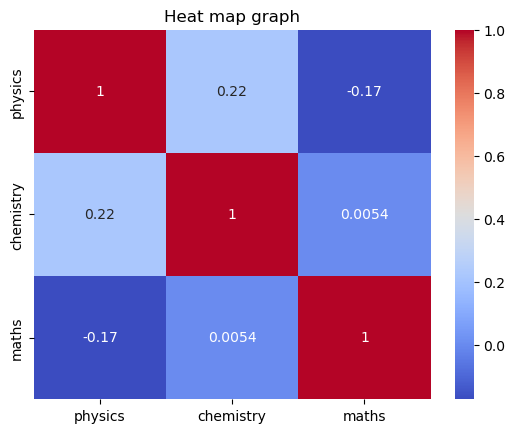

Min-max result: 0


In [41]:
#4 heatmap, min-max algo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'physics': [90,80,70,60,40],
    'chemistry': [36, 80, 67, 80, 30],
    'maths': [45, 89, 67, 37, 78]
})

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heat map graph")
plt.show()

#MINMAX
def minmax(depth, isMax):
    if depth <= 0:
        return 0

    if isMax:
        return max(minmax(depth-1, False), minmax(depth-2, False))
    else:
        return min(minmax(depth-1, True), minmax(depth-2, True))

score = minmax(4, True)
print("Min-max result:", score)

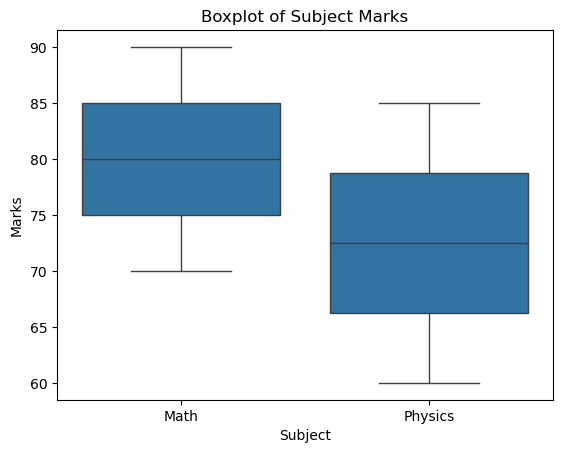

Alpha-Beta value: 5


In [47]:
# 5) BOX PLOT:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Subject': ['Math', 'Math', 'Physics', 'Physics'],
    'Marks': [90, 70, 85, 60]
})

sns.boxplot(x='Subject', y='Marks', data=df)
plt.title("Boxplot of Subject Marks")
plt.show()

#ALPHA-BETA:

#ALPHA-BETA:
def alpha_beta(depth, node_index, is_max, scores, alpha, beta, height):
    if depth == height:
        return scores[node_index]

    if is_max:
        best = float('-inf')
        for i in range(2):
            val = alpha_beta(depth + 1, node_index * 2 + i, False, scores, alpha, beta, height)
            best = max(best, val)
            alpha = max(alpha, best)

            # Prune if beta cutoff
            if beta <= alpha:
                break
        return best
    else:
        best = float('inf')
        for i in range(2):
            val = alpha_beta(depth + 1, node_index * 2 + i, True, scores, alpha, beta, height)
            best = min(best, val)
            beta = min(beta, best)

            # Prune if alpha cutoff
            if beta <= alpha:
                break
        return best

# Inputs
scores = [3, 5, 6, 9, 1, 2, 0, -1]
height = 3

# Output
print("Alpha-Beta value:", alpha_beta(0, 0, True, scores, float('-inf'), float('inf'), height))

In [58]:

# 6) Write a program to develop the Naive Bayes classifier on Titanic dataset.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("Titanic-Dataset.csv")

df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Naive Bayes Classifier Accuracy on Titanic dataset: {:.2f}%".format(accuracy * 100))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Naive Bayes Classifier Accuracy on Titanic dataset: 81.11%
Confusion Matrix:
[[44 10]
 [ 7 29]]


In [ ]:

7) KNN:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("glass.csv")

# Separate features and target
X = data.drop(columns=['Type'])  # all features except 'Type'
y = data['Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Set k = 3
k = 3

# Try both distance metrics
for p_val, metric_name in [(2, 'Euclidean'), (1, 'Manhattan')]:
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nK = {k}, Distance Metric = {metric_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


In [10]:
# Perceptron
import numpy as np

class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # bias + weights
        self.lr = lr
        self.epochs = epochs

    def activation_fn(self, x):
        # Step function
        return 1 if x >= 0 else 0

    def predict(self, X):
        x_with_bias = np.insert(X, 0, 1)  # add bias term
        weighted_sum = np.dot(self.weights, x_with_bias)
        return self.activation_fn(weighted_sum)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                # update weights and bias
                self.weights[1:] += self.lr * error * inputs
                self.weights[0]  += self.lr * error

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])

print("Training perceptron for AND function")
perceptron_and = Perceptron(input_size=2, lr=0.1, epochs=10)
perceptron_and.fit(X, y_and)
for inputs in X:
    print(f"Input: {inputs} Output: {perceptron_and.predict(inputs)}")

print("\nTraining perceptron for OR function")
perceptron_or = Perceptron(input_size=2, lr=0.1, epochs=10)
perceptron_or.fit(X, y_or)
for inputs in X:
    print(f"Input: {inputs} Output: {perceptron_or.predict(inputs)}")

Training perceptron for AND function
Input: [0 0] Output: 0
Input: [0 1] Output: 0
Input: [1 0] Output: 0
Input: [1 1] Output: 1

Training perceptron for OR function
Input: [0 0] Output: 0
Input: [0 1] Output: 1
Input: [1 0] Output: 1
Input: [1 1] Output: 1
